In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('dataset.csv')

OSError: [Errno 22] Invalid argument: 'D:\x03rd sem\\FDS\\Project\\dataset.csv'

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].mean()

28.893236911794666

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
Cat_columns=df.select_dtypes(exclude=np.number).columns
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

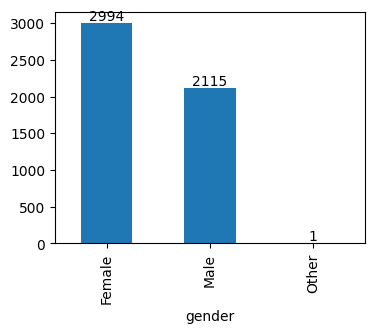

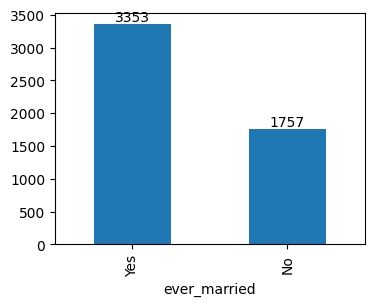

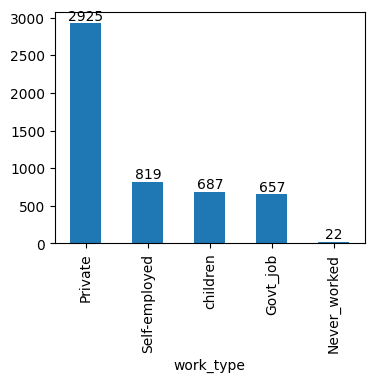

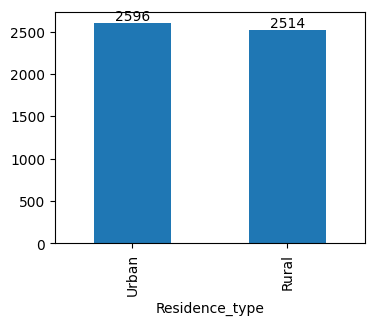

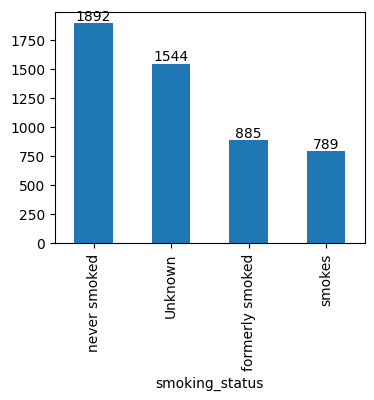

In [ ]:
for col in Cat_columns:
    plt.figure(figsize=(4, 3))
    ax = df[col].value_counts().plot(kind='bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

In [ ]:
Num_columns =df.select_dtypes(include=np.number).columns
Num_columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [ ]:
Num_cols=['age','avg_flucose_level','bmi']

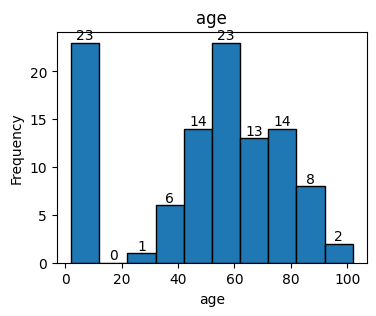

Column 'avg_flucose_level' not found in the DataFrame.


<Figure size 400x300 with 0 Axes>

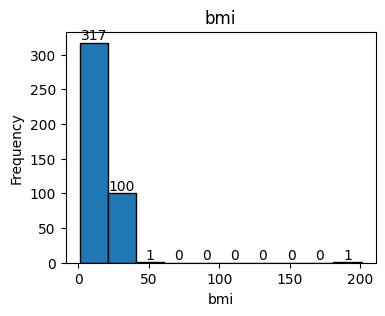

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(4, 3))
    
    # Plot the histogram if the column exists
    if col in df.columns:
        ax = df[col].value_counts().plot(kind='hist', edgecolor='black')
        for i in ax.containers:
            ax.bar_label(i)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

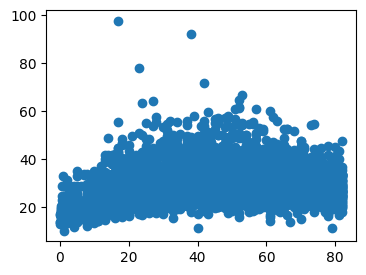

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(df.age,df.bmi)
plt.show()

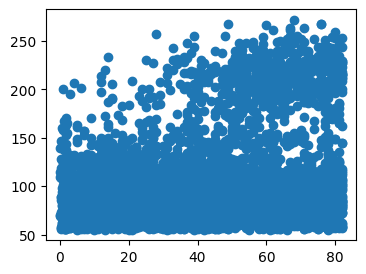

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(x=df.age,y=df.avg_glucose_level)
plt.show()

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

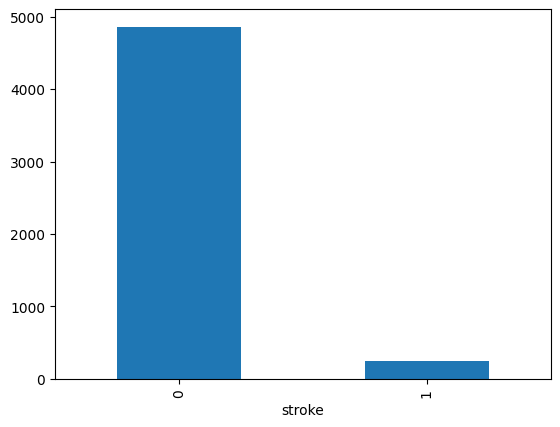

In [ ]:
ax=df.stroke.value_counts().plot(kind='bar')

In [ ]:
stroke_df=df[df['stroke']==1]
stroke_df.shape

(249, 12)

In [ ]:
no_stroke_df=df[df['stroke']==0]
no_stroke_df.shape

(4861, 12)

In [ ]:
no_stroke_df1=no_stroke_df.sample(300)
no_stroke_df1.shape

(300, 12)

In [ ]:
df_new=pd.concat([stroke_df,no_stroke_df1], axis=0)
df_new.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df_new.shape

(549, 12)

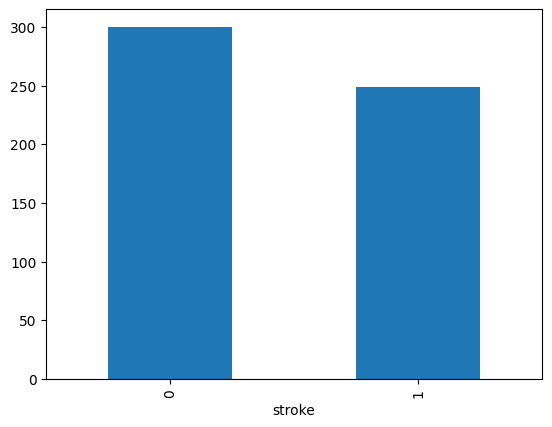

In [ ]:
ax=df_new.stroke.value_counts().plot(kind='bar')

In [ ]:
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
df=df.drop('id', axis=1)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [ ]:
df['work_type'] = df['work_type'].map({'Private': 1, 'Self-employed': 0,'Govt_job':2})

In [ ]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0,})

In [ ]:
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 1, 'never smoked': 0,'smokes':2})

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0,})

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,1.0,1,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1,0.0,0,202.21,28.893237,0.0,1
2,1.0,80.0,0,1,1,1.0,0,105.92,32.500000,0.0,1
3,0.0,49.0,0,0,1,1.0,1,171.23,34.400000,2.0,1
4,0.0,79.0,1,0,1,0.0,0,174.12,24.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1,1.0,1,83.75,28.893237,0.0,0
5106,0.0,81.0,0,0,1,0.0,1,125.20,40.000000,0.0,0
5107,0.0,35.0,0,0,1,0.0,0,82.99,30.600000,0.0,0
5108,1.0,51.0,0,0,1,1.0,0,166.29,25.600000,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          4401 non-null   float64
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     3566 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 439.3 KB


In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.005767,-0.006105,0.054722,-0.025606,0.077442,0.009081
age,-0.027752,1.000000,0.276398,0.263796,0.679125,-0.167600,0.014180,0.238171,0.325942,0.047766,0.245257
hypertension,0.021223,0.276398,1.000000,0.108306,0.164243,-0.065366,-0.007913,0.174474,0.160189,-0.000050,0.127904
heart_disease,0.085685,0.263796,0.108306,1.000000,0.114644,-0.056653,0.003092,0.161857,0.038899,0.058759,0.134914
ever_married,-0.030171,0.679125,0.164243,0.114644,1.000000,-0.042068,0.006261,0.155068,0.335705,0.069894,0.108340
work_type,0.005767,-0.167600,-0.065366,-0.056653,-0.042068,1.000000,0.000970,-0.032762,0.012361,0.004157,-0.039131
Residence_type,-0.006105,0.014180,-0.007913,0.003092,0.006261,0.000970,1.000000,-0.004946,-0.000120,0.038841,0.015458
avg_glucose_level,0.054722,0.238171,0.174474,0.161857,0.155068,-0.032762,-0.004946,1.000000,0.168751,0.013859,0.131945
bmi,-0.025606,0.325942,0.160189,0.038899,0.335705,0.012361,-0.000120,0.168751,1.000000,0.032854,0.038947
smoking_status,0.077442,0.047766,-0.000050,0.058759,0.069894,0.004157,0.038841,0.013859,0.032854,1.000000,0.021686


In [ ]:
df.drop('Residence_type', axis=1, inplace=True)

In [ ]:
df.isna().sum()

gender                  1
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type             709
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2) 

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
1594,1.0,61.0,0,0,1,1.0,89.75,25.4,0.0
778,0.0,63.0,0,0,1,1.0,92.70,29.5,0.0
2454,0.0,39.0,0,0,1,1.0,80.63,36.0,2.0
3825,0.0,52.0,0,0,1,1.0,118.46,61.6,2.0
3035,1.0,33.0,0,0,1,0.0,90.68,31.7,2.0


In [ ]:
y_test.head()

3571    0
1570    0
1843    0
2070    0
2396    0
Name: stroke, dtype: int64

In [ ]:
len(X_test), len(y_test)

(697, 697)

# Model

## 1.RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
np.random.seed(42)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

randomForest_acc = accuracy_score(y_test, y_pred)
randomForest_acc

0.9253945480631277

## 2.LogisticRegression

In [ ]:
model = LogisticRegression()
np.random.seed(42)
model.fit(X_train, y_train)

/home/vijay/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

logisticReg_acc = accuracy_score(y_test, y_pred)
logisticReg_acc

0.926829268292683

## 3.KNeighborsClassifier

In [ ]:
clf2 = KNeighborsClassifier()
np.random.seed(42)
clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

kNeighborsClf_acc = accuracy_score(y_test, y_pred)
kNeighborsClf_acc

0.9239598278335724

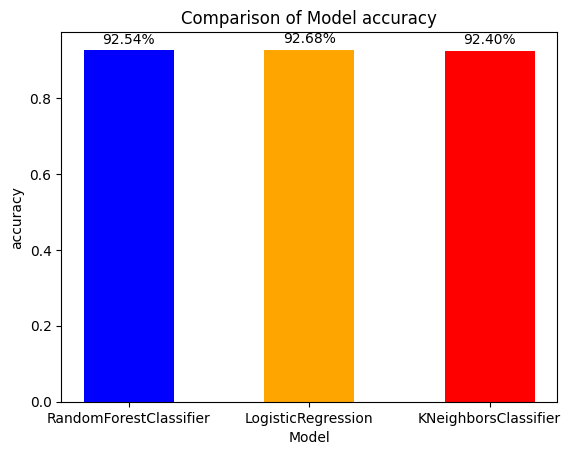

In [ ]:
models = ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier']
values = [randomForest_acc, logisticReg_acc, kNeighborsClf_acc]

plt.bar(models, values, color=['blue', 'orange', 'red'], width=0.5)
plt.xlabel('Model')
plt.ylabel('accuracy')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v*100:.2f}%', ha='center', va='bottom')

plt.title("Comparison of Model accuracy")
plt.show()